In [1]:
import importlib, importlib.util

def module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

In [13]:
MLNN = module_from_file("myclasses", "MLNN.py")

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import sklearn
from sklearn.model_selection import train_test_split
from itertools import permutations 
from scipy import stats
import random

In [4]:
class ReadData(object):
    
    def __init__(self, data, file, dim):
        
        self.file = file
            
        df = pd.read_csv(file, header = None)
        data = df.values
            
        self.data = data 
        self.dim = dim


    def plotData(self):
        
        if(self.dim == 2):
            
            X = self.data[:,self.dim-2]
            Y = self.data[:, self.dim-1]
            plt.scatter(X, Y, s = 1) 
            
        if(self.dim == 3):
            
            x = self.data[:, self.dim-3]
            y = self.data[:, self.dim-2]
            z = self.data[:, self.dim-1]
            
            fig = plt.figure() 
            ax = plt.axes(projection ='3d')
            ax.scatter(x, y, z, c = 'r', s = 1)
            
        plt.show() 


    def train_validation_test_split(self, perTrain, perVal, perTest):
            
        train, test = train_test_split(self.data, test_size=perTest, random_state=42, shuffle=True)
        train, val = train_test_split(train, test_size = (perVal/(perVal + perTrain)), random_state=42, shuffle=True)
            
        return train, val, test

# Univariate Data

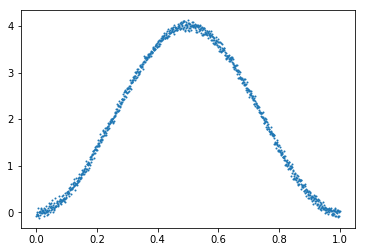

In [5]:
dataset = ReadData([], 'Dataset/Regression/UnivariateData/17.csv', 2)
dataset.plotData()
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [6]:
X = trainData[:,:1]
Y = trainData[:,1:]

In [34]:
def checkParam(η, α, β, epochs, low, high):

    nn = MLNN.MLNN([1,3,3,1],['logistic','logistic','linear'], low, high)
    a,b = nn.fit(X, Y, η, α, β, epochs)

    plt.scatter(X,Y, s = 1)
    plt.scatter(X, nn.predict(X, β), s=1)
    plt.show()
    
    print('Error on Training data =', b[-1])

    x = valData[:,:1]
    y = valData[:,1:]
    predVal = nn.predict(x, β)
    plt.scatter(x, y, s=1)
    plt.scatter(x, predVal, s=1)
    plt.show()

    print('Error on Validation data =', np.sum(((y-predVal)**2)/(2*len(x))))
    
    return nn, a

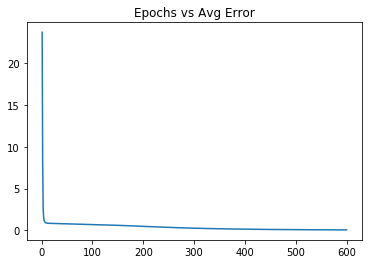

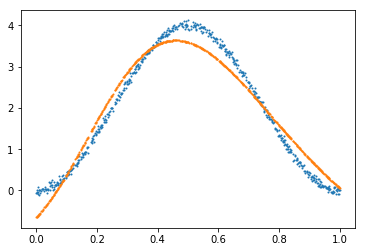

Error on Training data = 0.04611717566455286


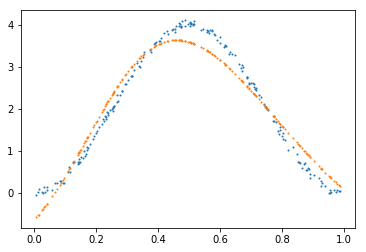

Error on Validation data = 0.04840072379932784


In [52]:
nn, W = checkParam(0.0855, 0.4, 0.45, 600, -5, 5)

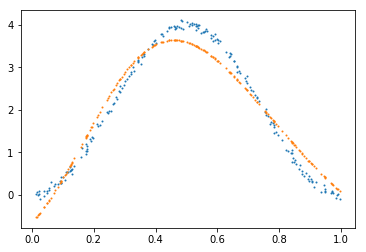

RMSE on test data = 0.049272543340306924


In [54]:
Xtest = testData[:,:1]
Ytest = testData[:,1:]

predsTest = nn.predict(Xtest, 0.45)

plt.scatter(Xtest, Ytest, s = 1)
plt.scatter(Xtest, predsTest, s = 1)
plt.show()

print('RMSE on test data =', np.sum(((Ytest-predsTest)**2)/(2*len(Ytest))))

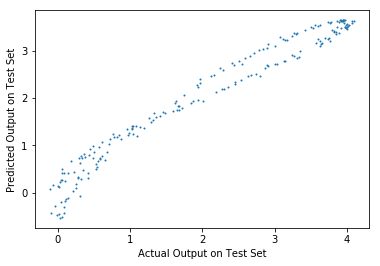

In [57]:
plt.scatter(Ytest, predsTest, s = 1)
plt.xlabel('Actual Output on Test Set')
plt.ylabel('Predicted Output on Test Set')
plt.show()

# Bivariate Data

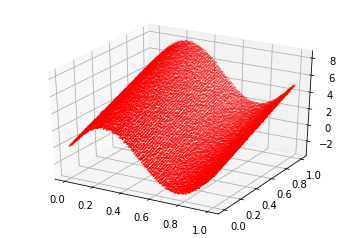

In [58]:
dataset = ReadData([], 'Dataset/Regression/BivariateData/17.csv', 3)
dataset.plotData()
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [60]:
X1 = trainData[:,:1]
X2 = trainData[:,range(1,2)]
Y = trainData[:,2:]

X = trainData[:,:2]

In [61]:
def checkParam3d(η, α, β, epochs, low, high):

    nn = MLNN.MLNN([2,3,3,1],['logistic','logistic','linear'], low, high)
    a,b = nn.fit(X, Y, η, α, β, epochs)
    
    fig = plt.figure() 
    ax = plt.axes(projection ='3d') 
    
    ax.scatter(X1, X2, Y, c = 'c', s = 1) 
    ax.scatter(X1, X2, nn.predict(X, β), c = 'r', s = 1) 
    plt.show() 
    
    print('Error on Training data =', b[-1])

    x = valData[:,:2]
    y = valData[:,2:]
    predVal = nn.predict(x, β)
    
    fig = plt.figure() 
    ax = plt.axes(projection ='3d') 
    
    ax.scatter(x[:,:1], x[:,1:], y, c = 'c', s = 1) 
    ax.scatter(x[:,:1], x[:,1:], predVal, c = 'r', s = 1) 
    plt.show() 

    print('Error on Validation data =', np.sum(((y-predVal)**2)/(2*len(x))))
    
    return nn, a

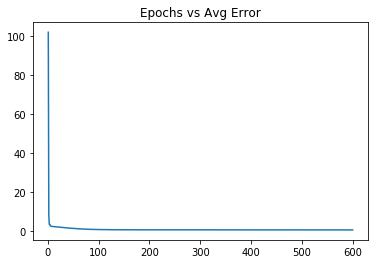

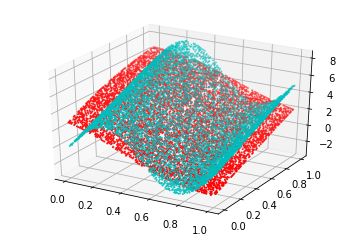

Error on Training data = 0.7526626862429867


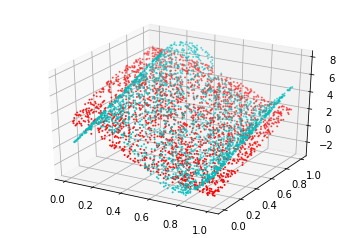

Error on Validation data = 0.7570515017882337


In [75]:
nn, W = checkParam3d(0.0858, 0.35, 0.41, 600, -5, 5)

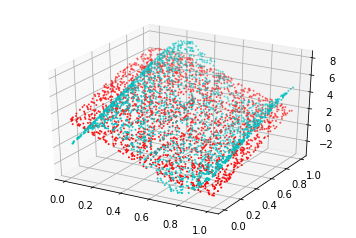

RMSE on test data = 0.7497245870725036


In [76]:
Xtest = testData[:,:2]
Ytest = testData[:,2:]

predsTest = nn.predict(Xtest, 0.41)

fig = plt.figure() 
ax = plt.axes(projection ='3d') 
    
ax.scatter(Xtest[:,:1], Xtest[:,1:], Ytest, c = 'c', s = 1) 
ax.scatter(Xtest[:,:1], Xtest[:,1:], predsTest, c = 'r', s = 1) 
plt.show() 

print('RMSE on test data =', np.sum(((Ytest-predsTest)**2)/(2*len(Ytest))))

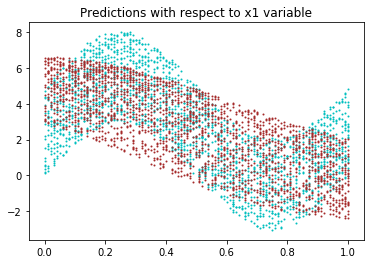

In [87]:
plt.scatter(Xtest[:,:1], Ytest, s = 1, c = 'c')
plt.scatter(Xtest[:,:1], predsTest, s = 1, c = 'brown')
plt.title('Predictions with respect to x1 variable')
plt.show()

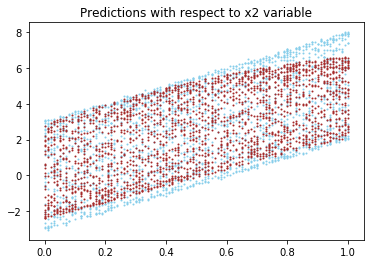

In [88]:
plt.scatter(Xtest[:,1:], Ytest, s = 1, c = 'skyblue')
plt.scatter(Xtest[:,1:], predsTest, s = 1, c = 'brown')
plt.title('Predictions with respect to x2 variable')
plt.show()

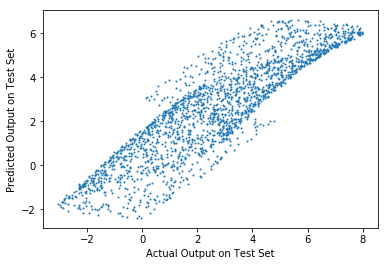

In [79]:
plt.scatter(Ytest, predsTest, s = 1)
plt.xlabel('Actual Output on Test Set')
plt.ylabel('Predicted Output on Test Set')
plt.show()